In [1]:
import sys
import numpy as np
import math
import cmath
%matplotlib notebook

import matplotlib.pyplot as plt
#%matplotlib inline
plt.style.use('fivethirtyeight')

### Задание №1
Найти машинный эпсилон

In [2]:
e=float(1)
i=0
while e+1!=1: #считаем наш эпсилон, пока питон не перестанет воспринмать его как значещее число
    i+=1
    e_o=e
    e=float(e/2)
print(i)
print('Значение эпсилона',e_o)
print('Равен ли найденный машинный эпсилон и полученный из самого Питона:',e_o==sys.float_info.epsilon)

53
Значение эпсилона 2.220446049250313e-16
Равен ли найденный машинный эпсилон и полученный из самого Питона: True


### Задание №2
Для модуля схема дифференцирования с комлексным шагом не будет работать

In [3]:
def f0(x):
    return(abs(x))

In [4]:
def comp_diff(f,x0,h):
    return((f(x0+1j*h).imag)/h)

In [6]:
x0 = 0
hh = np.logspace(-12, -4, 91)

<IPython.core.display.Javascript object>


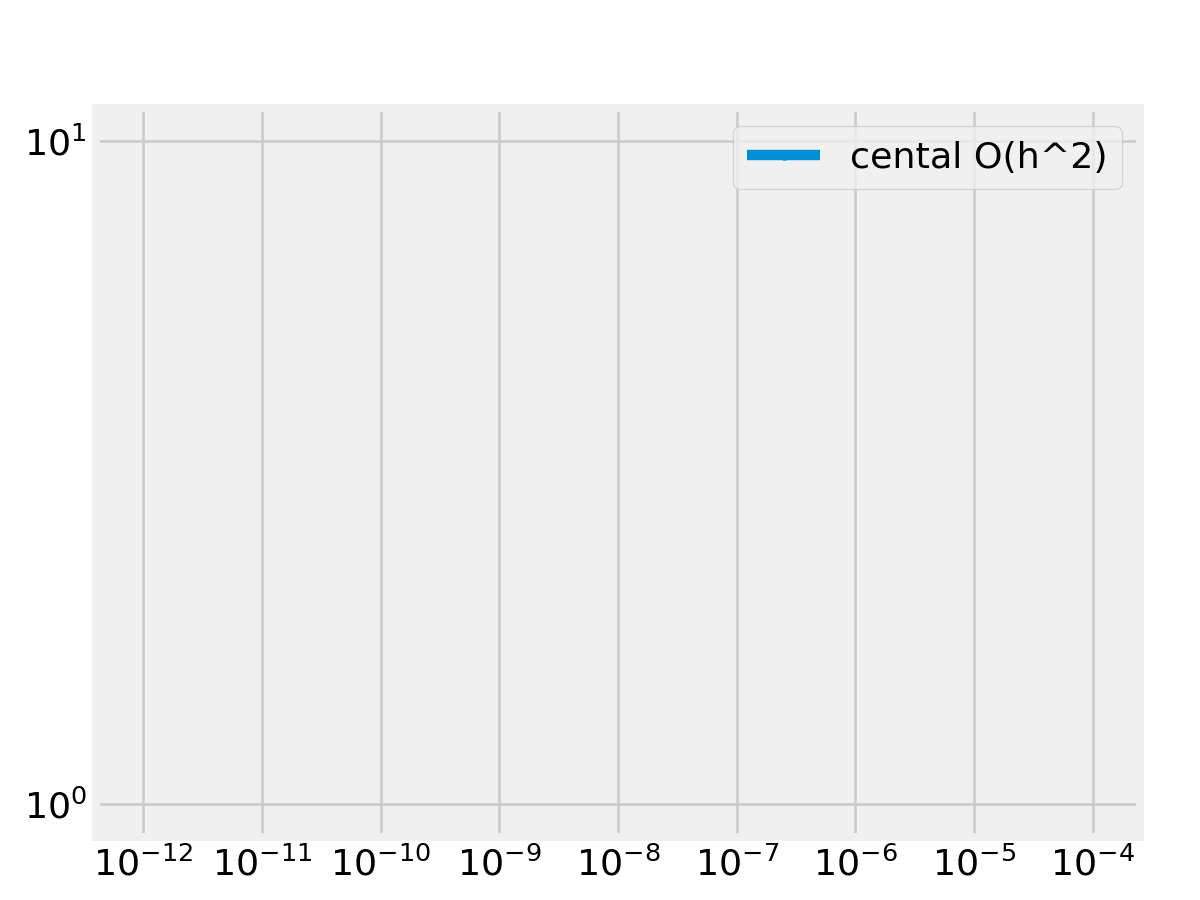

D:\Programms\Anaconda\lib\site-packages\matplotlib\ticker.py:2210: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


In [7]:
plt.loglog(hh, [abs(comp_diff(f0, x0, h)) for h in hh], 
           '.-', label='cental O(h^2)')
plt.legend(loc='best')

<IPython.core.display.Javascript object>


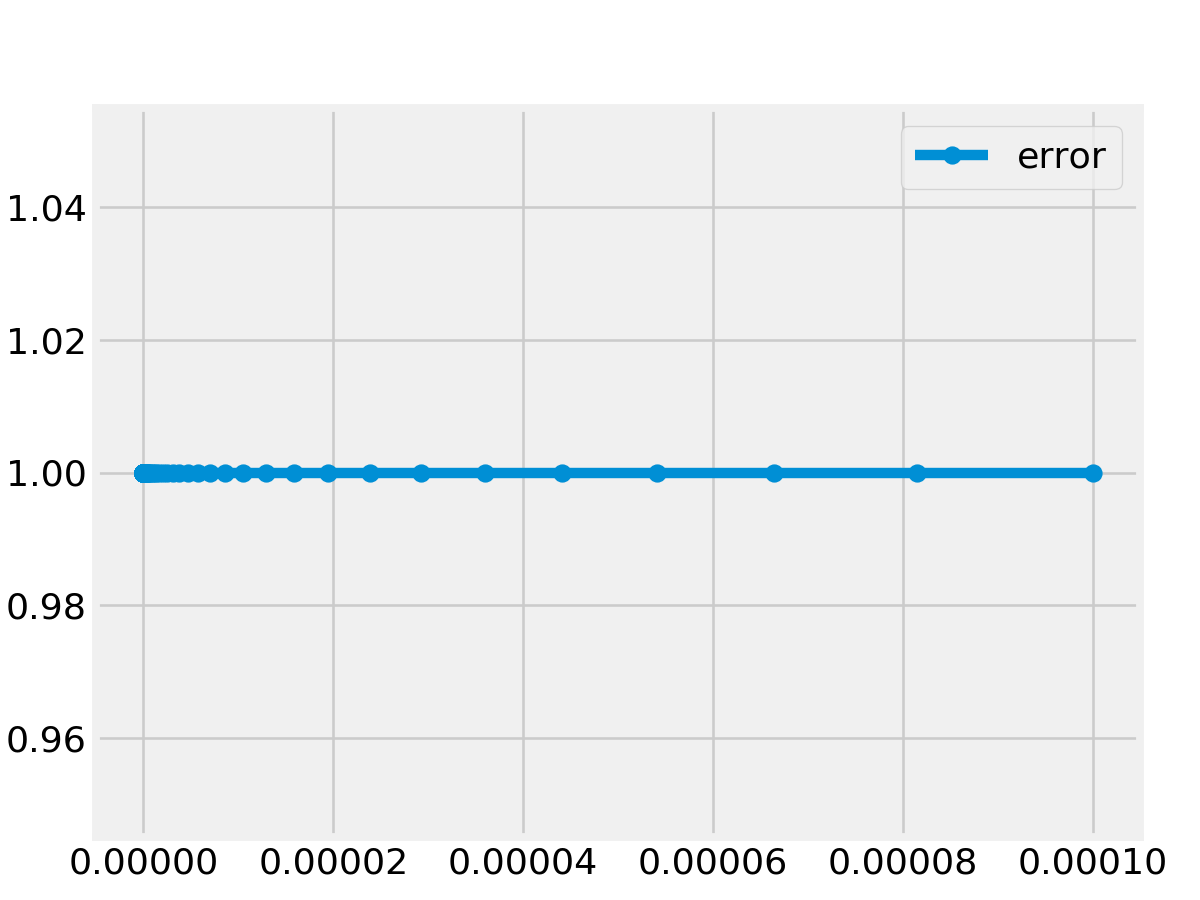

In [13]:
x0=1
exact = x0/(abs(x0))
err=[]
[err.append(abs(comp_diff(f0,x0,h) - exact)) for h in hh]
plt.plot(hh, err,
           'o-', label='error')
plt.legend(loc='best')

In [9]:
for h in hh:
    print(h, ': ', comp_diff(f0,x0,h),': ',)

1e-12 :  0.0 : 
1.2271252398511891e-12 :  0.0 : 
1.5058363542798384e-12 :  0.0 : 
1.8478497974222943e-12 :  0.0 : 
2.2675431258708043e-12 :  0.0 : 
2.7825594022071257e-12 :  0.0 : 
3.4145488738336006e-12 :  0.0 : 
4.190079105786665e-12 :  0.0 : 
5.141751827683917e-12 :  0.0 : 
6.309573444801943e-12 :  0.0 : 
7.742636826811278e-12 :  0.0 : 
9.50118507318144e-12 :  0.0 : 
1.1659144011798312e-11 :  0.0 : 
1.4307229891937558e-11 :  0.0 : 
1.755676291274998e-11 :  0.0 : 
2.1544346900318868e-11 :  0.0 : 
2.6437611857491013e-11 :  0.0 : 
3.2442260791716296e-11 :  0.0 : 
3.9810717055349695e-11 :  0.0 : 
4.885273571519382e-11 :  0.0 : 
5.994842503189421e-11 :  0.0 : 
7.356422544596421e-11 :  0.0 : 
9.027251779484579e-11 :  0.0 : 
1.1077568505097087e-10 :  0.0 : 
1.3593563908785242e-10 :  0.0 : 
1.6681005372000558e-10 :  0.0 : 
2.0469682718075242e-10 :  0.0 : 
2.511886431509582e-10 :  0.0 : 
3.0823992397451435e-10 :  0.0 : 
3.782489906389382e-10 :  0.0 : 
4.6415888336127913e-10 :  0.0 : 
5.69581

### Задание №3 
Релизовать алгоритм вычисления первой производной методом дифференцирования с комплексным шагом. Для функции с известным значением производной, изучить сходимость численного ответа при уменьшении шага.

Наша функция $x^5+5x^2$

In [10]:
def f1(x):
    return (x**5+5*x**2)

Алгоритм дифференцирование с комплексным шагом в задании №2

На графике видно, что чем меньше наш шаг, тем меньше разница между реальным значением производной и значением, посчитанным с помощью алгоритма

<IPython.core.display.Javascript object>


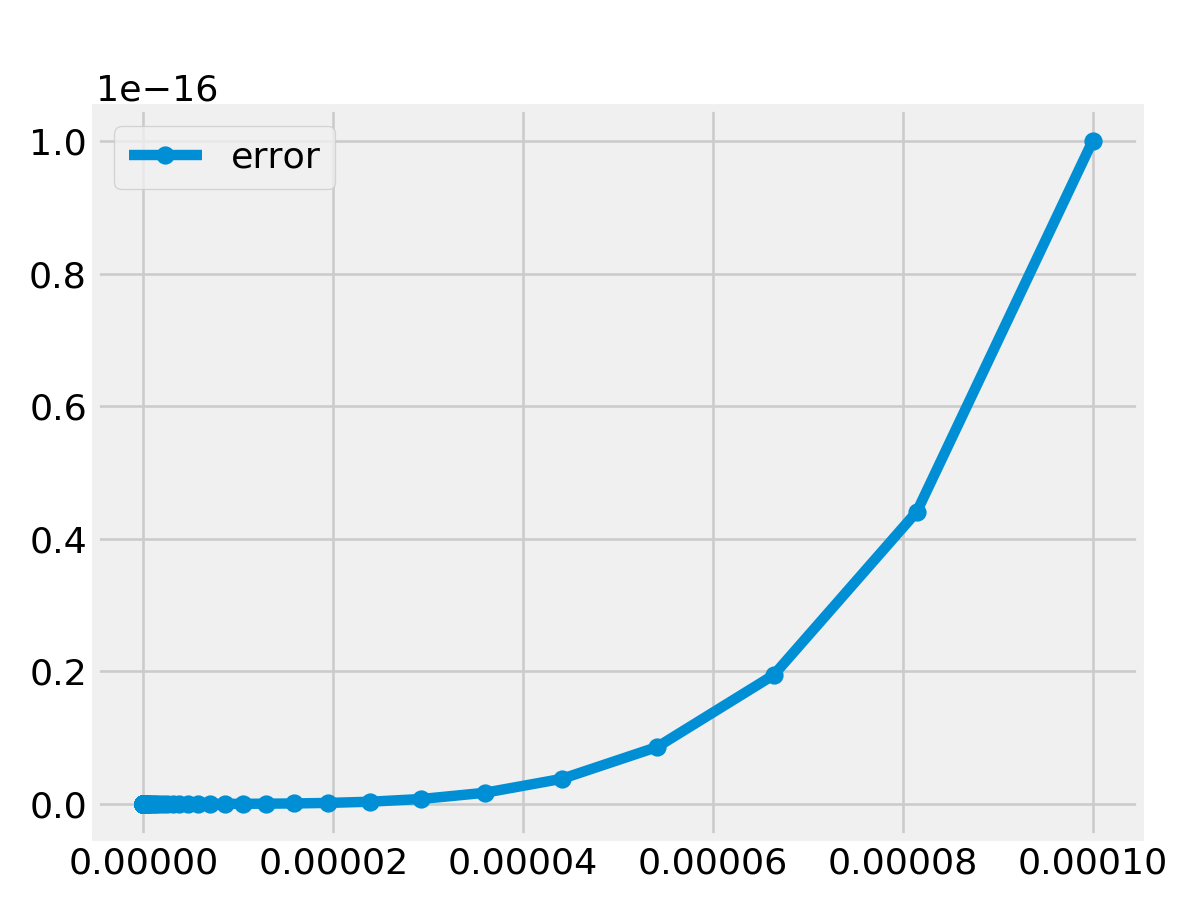

In [12]:
x0=0
exact = 5*x0**4+10*x0
err=[]
[err.append(abs(comp_diff(f1,x0,h) - exact)) for h in hh]
plt.plot(hh, err,
           'o-', label='error')
plt.legend(loc='best')

### Задание 5 
Написать программу, вычисляющую производную функции $x^2 \ln x$ в точке $x = 0$ с точностью $O(h^2)$.

Так как производная и функция в точке 0 не будет определена для действительных чисел, то можно лишь посчитать производной функции в значениях стремящихся к нулю

In [14]:
def f2(x):
    return (x**2*math.log(x))

In [15]:
def f2_1(x):
    return (x**2*cmath.log(x))

Численно можно посчитать производную с помощью центральной схема c комплексной частью и с помощью дифференцирования с комплексным шагом

In [16]:
def deriv_3(f, x0, h):
    return ((-0.5)*f(x0-h)+0*f(x0 + h) + 0.5*f(x0 + h))/h

In [26]:
for h in hh:
    print(h, ': ', deriv_3(f2_1,x0,h),': ',)

1e-12 :  -1.5707963267948965e-12j : 
1.2271252398511891e-12 :  -1.927563819275554e-12j : 
1.5058363542798384e-12 :  -2.3653622140569886e-12j : 
1.8478497974222943e-12 :  -2.9025956742596335e-12j : 
2.2675431258708043e-12 :  -3.5618484129668773e-12j : 
2.7825594022071257e-12 :  -4.370834088075556e-12j : 
3.4145488738336006e-12 :  -5.36356082867947e-12j : 
4.190079105786665e-12 :  -6.581760868349738e-12j : 
5.141751827683917e-12 :  -8.076644884216843e-12j : 
6.309573444801943e-12 :  -9.911054790737512e-12j : 
7.742636826811278e-12 :  -1.2162105487262047e-11j : 
9.50118507318144e-12 :  -1.4924426613151905e-11j : 
1.1659144011798312e-11 :  -1.83141405873055e-11j : 
1.4307229891937558e-11 :  -2.2473744160865666e-11j : 
1.755676291274998e-11 :  -2.757809869375654e-11j : 
2.1544346900318868e-11 :  -3.38417809742159e-11j : 
2.6437611857491013e-11 :  -4.152810359497609e-11j : 
3.2442260791716296e-11 :  -5.0960184084550054e-11j : 
3.9810717055349695e-11 :  -6.253452811761425e-11j : 
4.8852735715

При уменьшении точности значение производной всё дальше отходит от того значения к которому реально страмится производная, то есть от 0

<IPython.core.display.Javascript object>


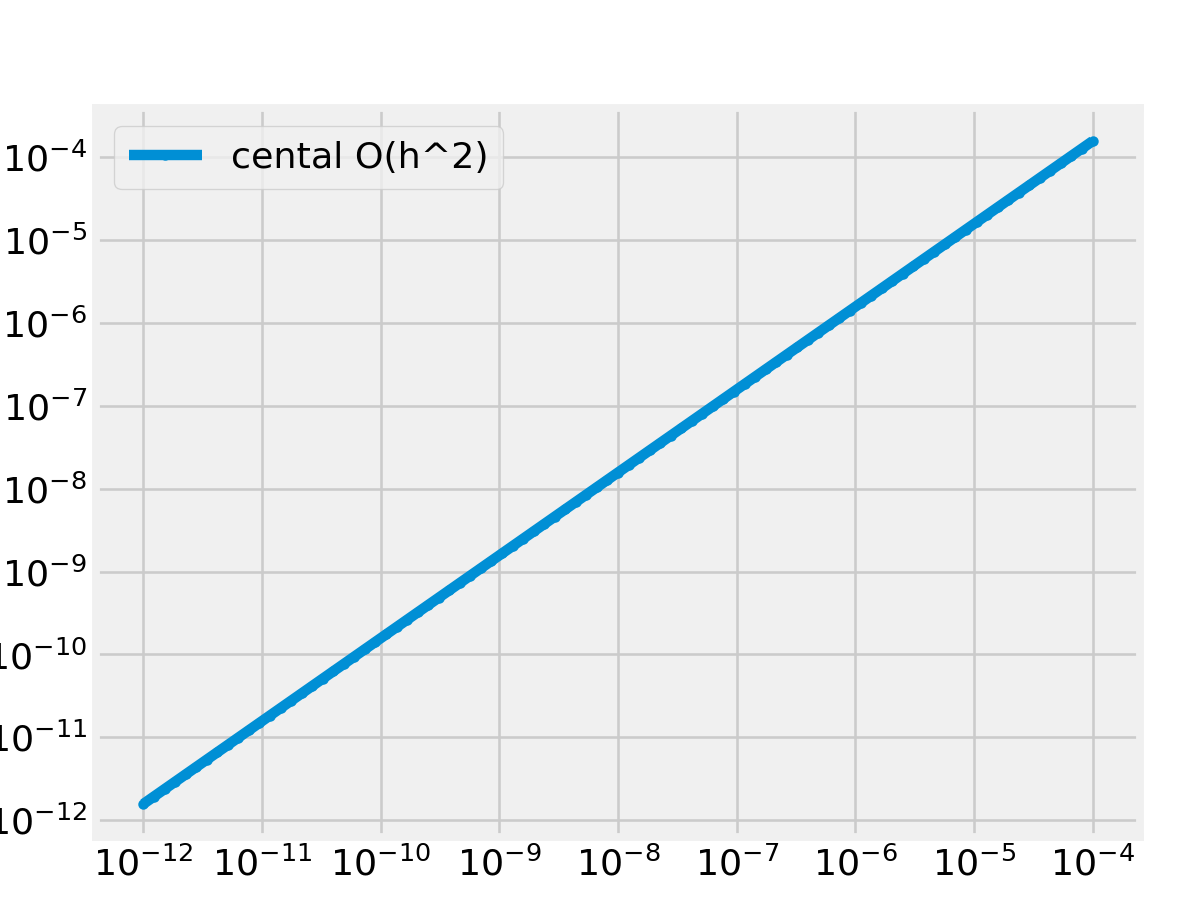

In [17]:
x0=0
#exact = 2*x0*cmath.log(x0)+x0**2*(1/x0)
plt.loglog(hh, [abs(deriv_3(f2_1, x0, h)) for h in hh], 
           '.-', label='cental O(h^2)')
plt.legend(loc='best')

То же самое происходи и со схемой с комплексным шагом

<IPython.core.display.Javascript object>


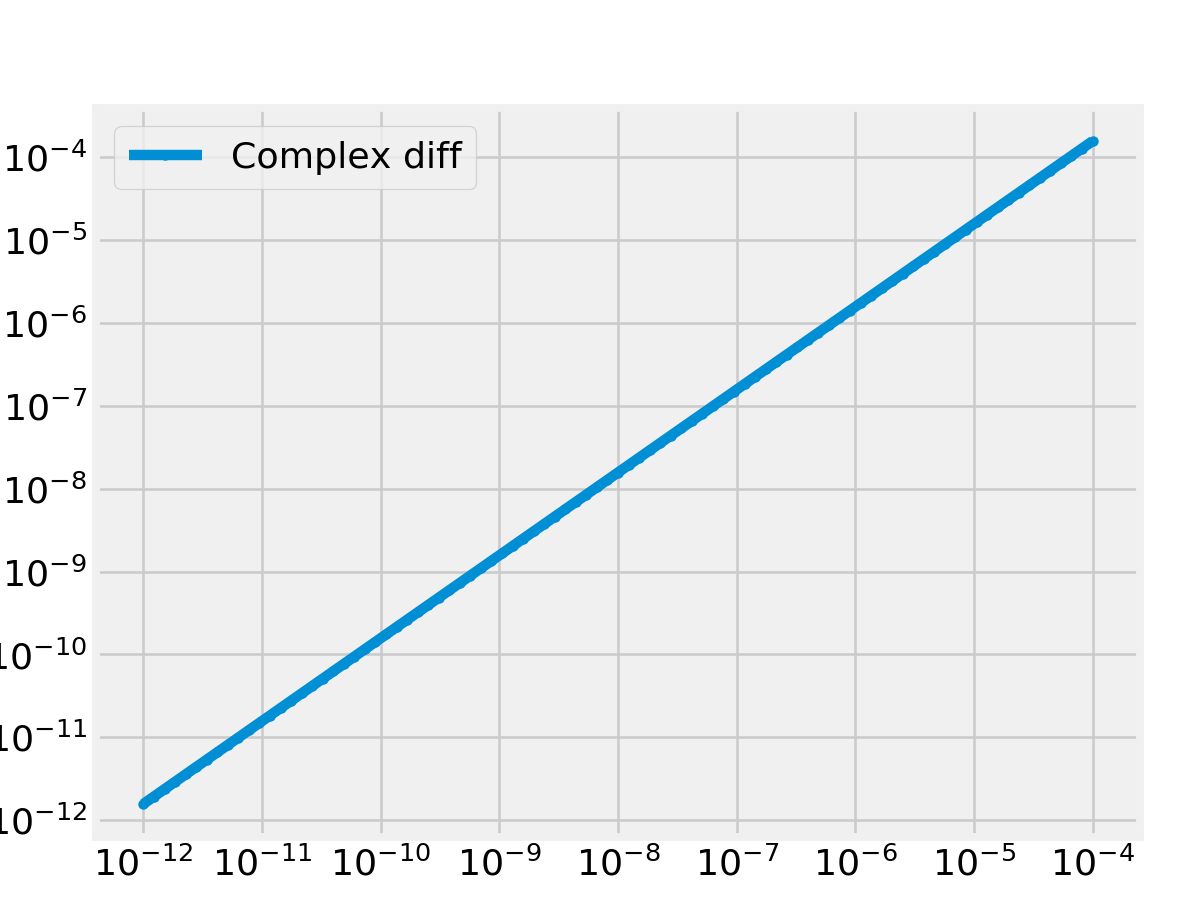

In [18]:
x0=0
#exact = 2*x0*cmath.log(x0)+x0**2*(1/x0)
plt.loglog(hh, [abs(comp_diff(f2_1, x0, h)) for h in hh], 
           '.-', label='Complex diff')
plt.legend(loc='best')

In [19]:
X=np.linspace(0.1,10,100)

Найдём наилучший шаг для центральной схемы производной первого порядка с точностью  $O(h^2)$

<IPython.core.display.Javascript object>


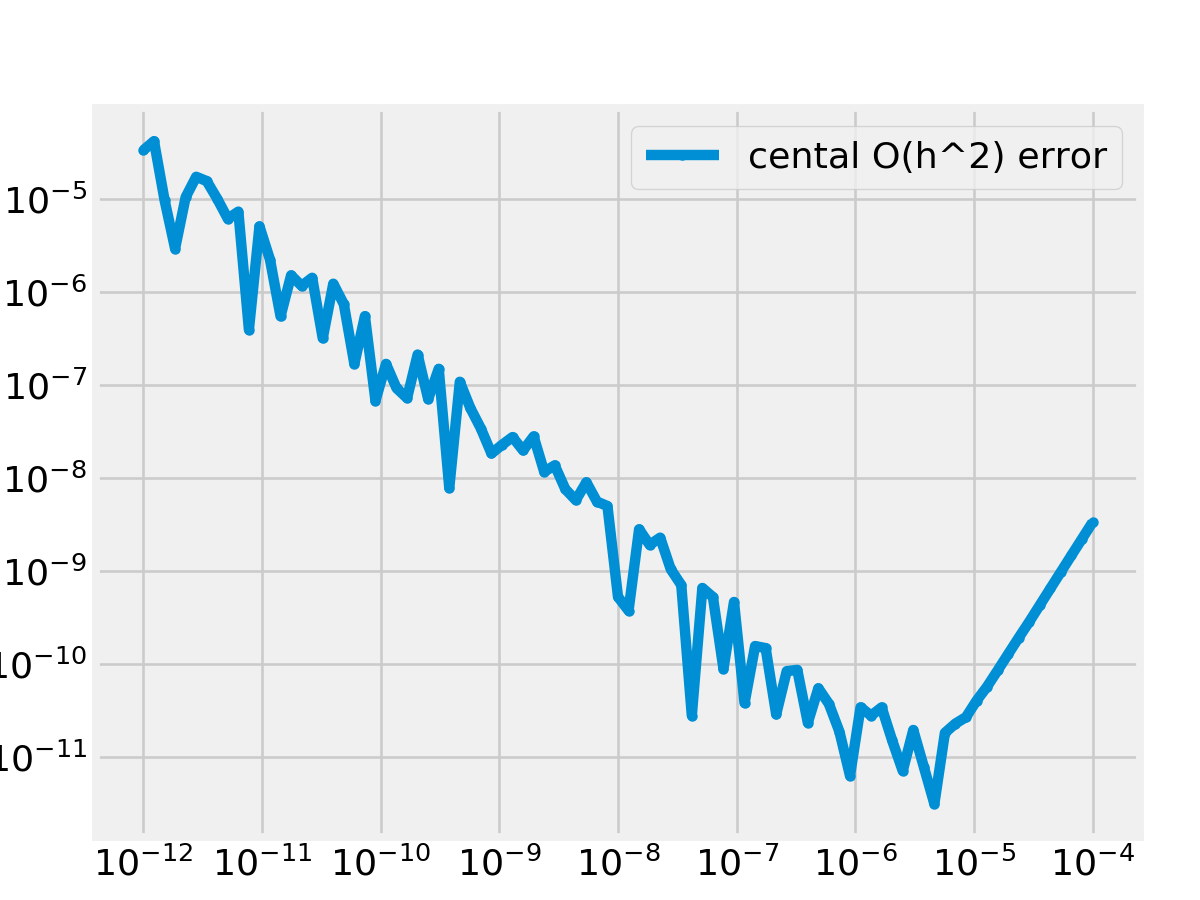

In [20]:
x0=1
exact = 2*x0*math.log(x0)+x0**2*(1/x0)
plt.loglog(hh, [abs(deriv_3(f2, x0, h)-exact) for h in hh], 
           '.-', label='cental O(h^2) error')
plt.legend(loc='best')

Найдём наилучший шаг для односторонней схемы производной первого порядка с точностью  $O(h^2)$

In [21]:
def deriv_4(f, x0, h):
    return ((-3/2)*f(x0)+2.0*f(x0 + h) - 0.5*f(x0 +2.0*h))/h

<IPython.core.display.Javascript object>


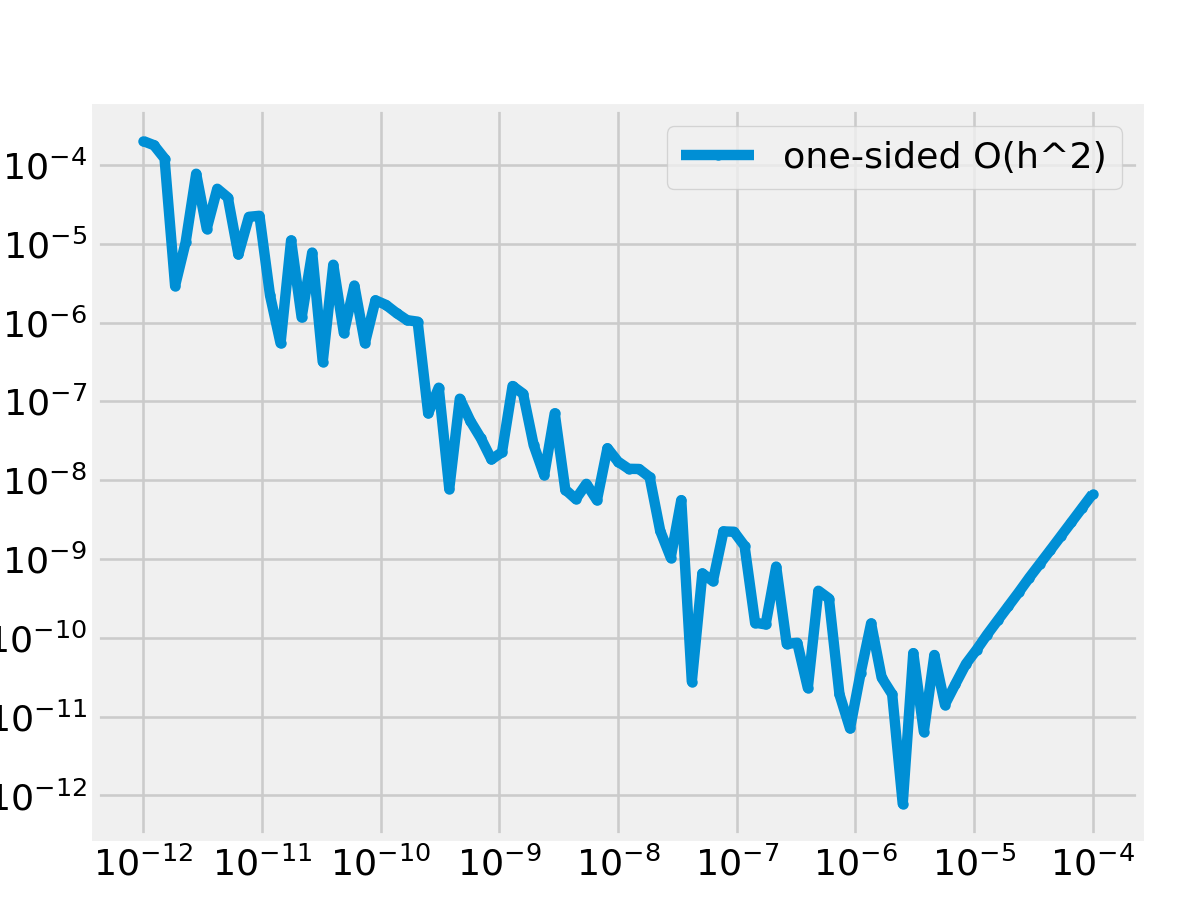

In [22]:
x0=1
exact = 2*x0*math.log(x0)+x0**2*(1/x0)
plt.loglog(hh, [abs(deriv_4(f2, x0, h)-exact) for h in hh], 
           '.-', label='one-sided O(h^2)')
plt.legend(loc='best')

Как можно наблюдать на графиках зависимостей значений функции рассчитанных с помощью центральной схемы и односторонней схемы, значения производной в точке 1 сходятся к 1, что и является реальным значением нашей производной
Сходиться начинает только после 10^-10 из-за того, что уже обсуждалось - Питон съедает точность при меньших значениях шага

<IPython.core.display.Javascript object>


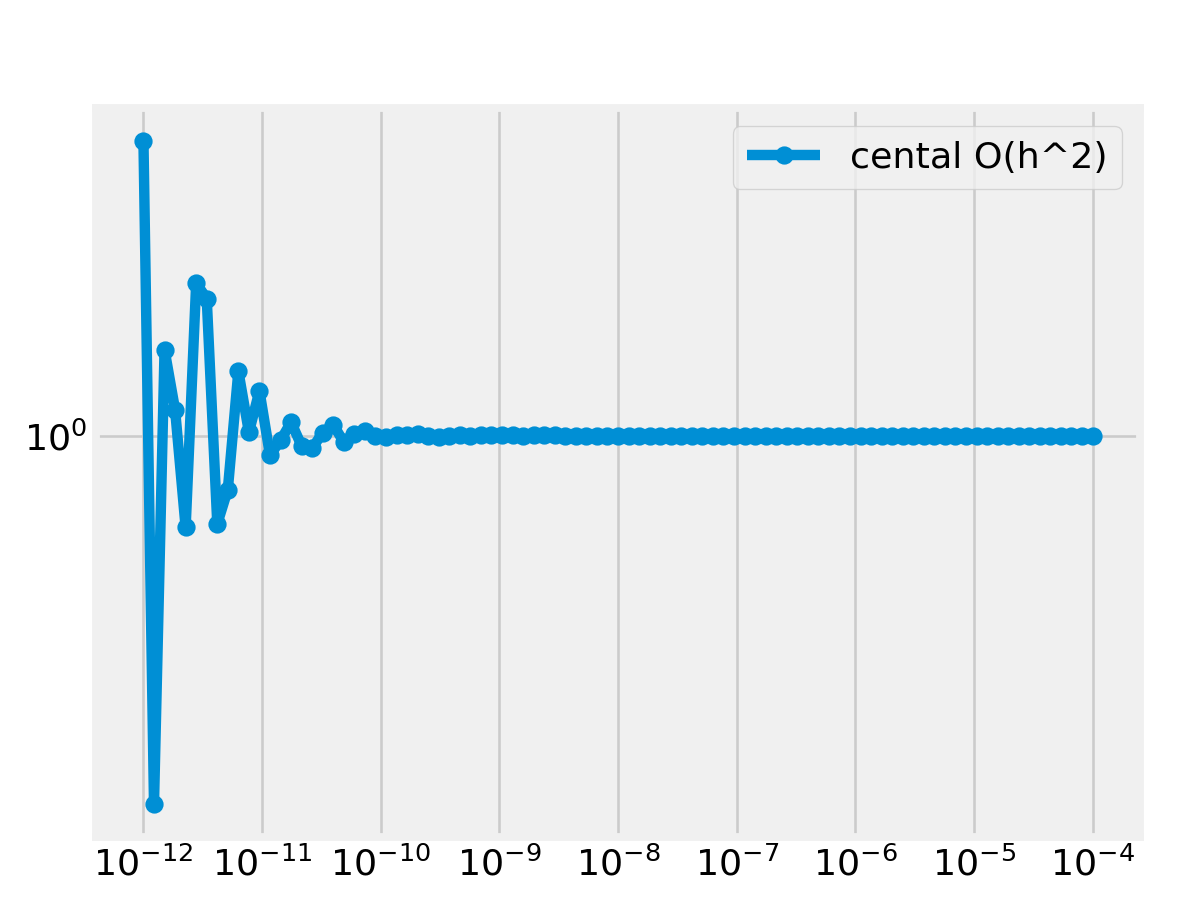

In [25]:
x0=1
exact = 2*x0*math.log(x0)+x0**2*(1/x0)
plt.loglog(hh, [abs(deriv_3(f2, x0, h)) for h in hh], 
           'o-', label='cental O(h^2)')
plt.legend(loc='best')

<IPython.core.display.Javascript object>


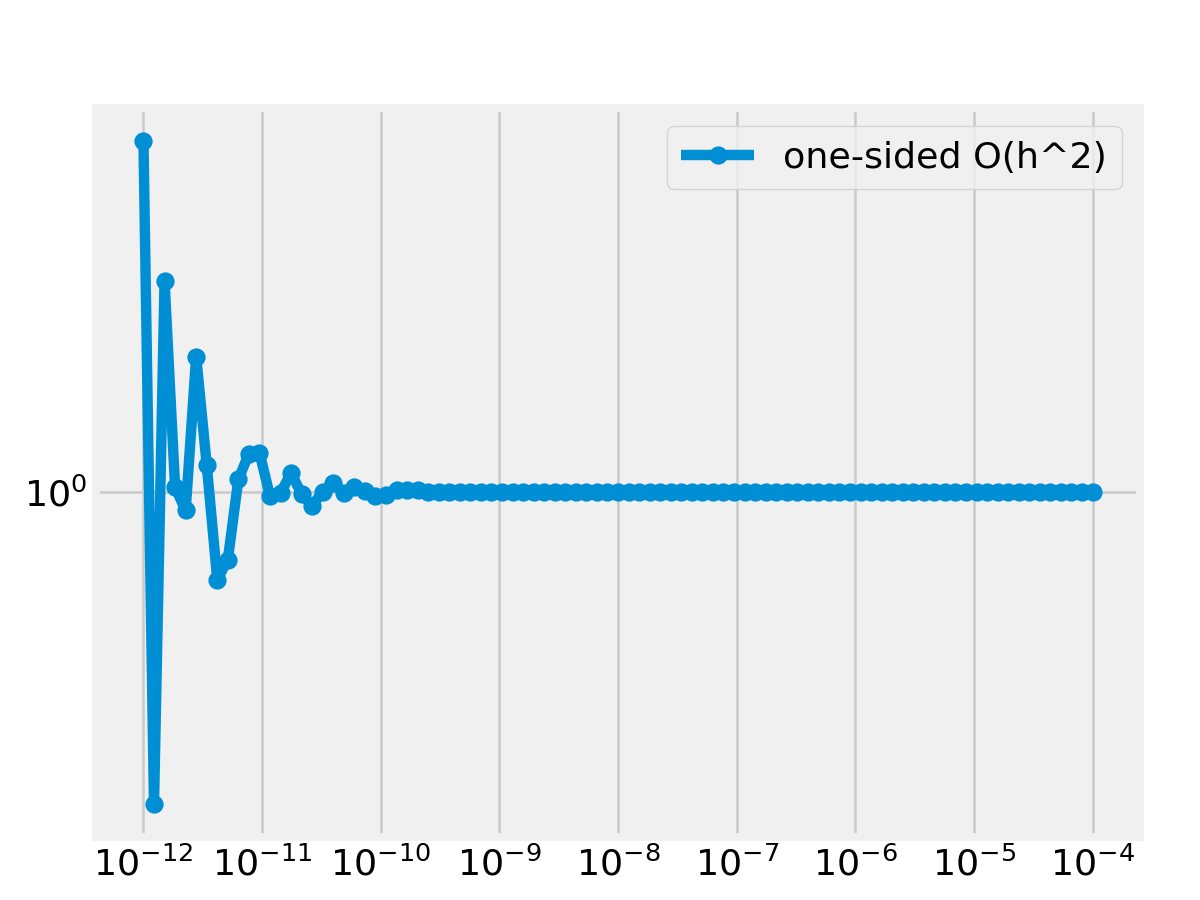

In [26]:
x0=1
exact = 2*x0*math.log(x0)+x0**2*(1/x0)
plt.loglog(hh, [abs(deriv_4(f2, x0, h)) for h in hh], 
           'o-', label='one-sided O(h^2)')
plt.legend(loc='best')

Посмотрим на графики реальных значений производной и найденных с помощью центральной и односторонней схем для различных ненулевых значений

<IPython.core.display.Javascript object>


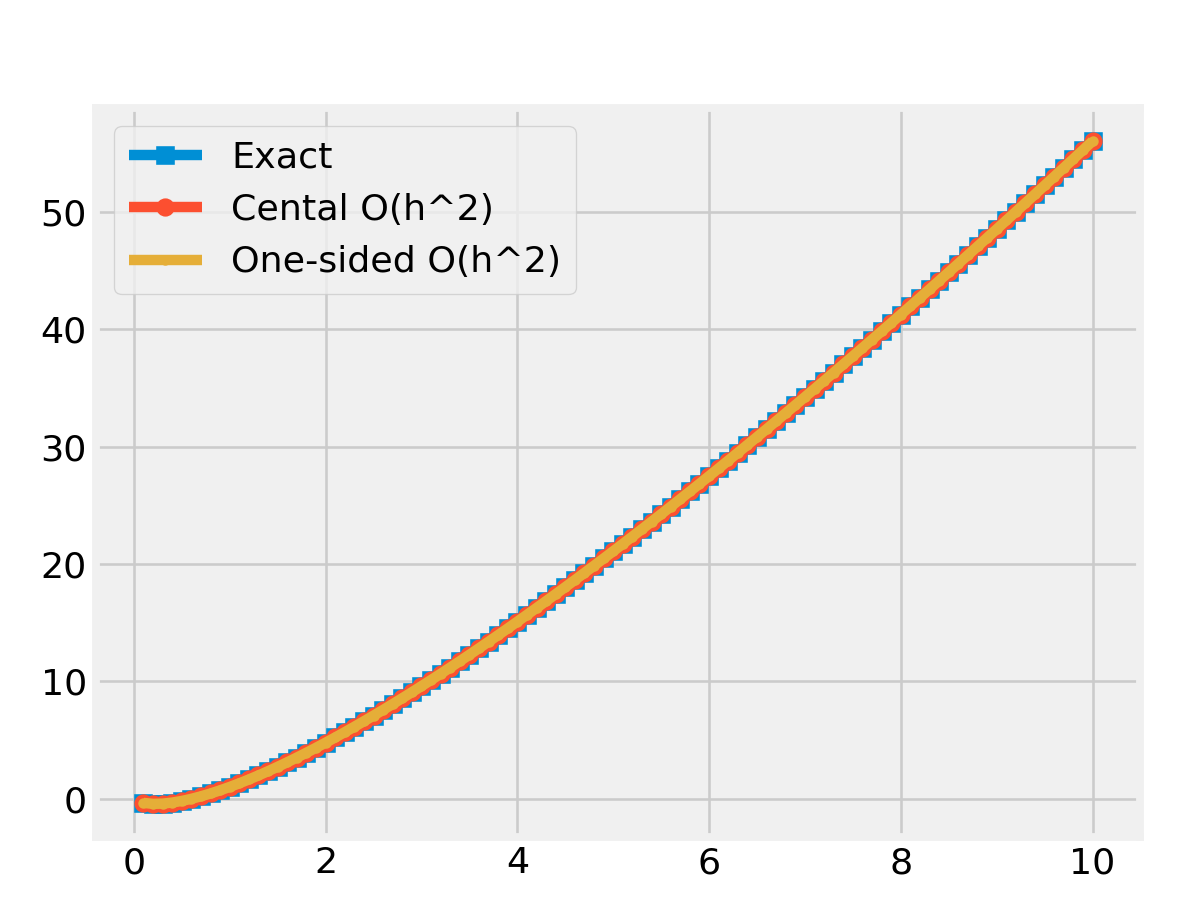

In [27]:
plt.plot(X,[2*x0*math.log(x0)+x0**2*(1/x0) for x0 in X],'s-', label='Exact')
plt.plot(X,[deriv_3(f2,x0,1e-5) for x0 in X],'o-', label='Cental O(h^2)')
plt.plot(X,[deriv_4(f2,x0,1e-5) for x0 in X],'.-', label='One-sided O(h^2)')
plt.legend(loc='best')